# Pipeline_GridSearchCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Breast Cancer

In [2]:
np.random.seed(1)
wine = datasets.load_wine()
# print description
# print(cancer.DESCR)

In [3]:
# get the data
X = wine.data
y = wine.target

Podzielmy zbiór na część testową i treningową .

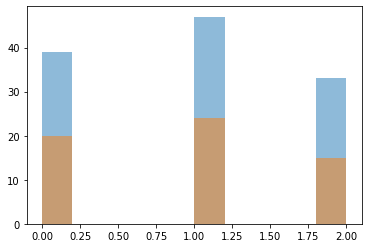

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [6]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 10,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler()}

In [8]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [9]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

In [13]:
from sklearn import  metrics

models = []

def get_scores(name, model):
    precision_score = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    recall_score = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    f1_score = metrics.f1_score(y_test, model.predict(X_test), average='micro')
    accuracy_score = metrics.accuracy_score(y_test, model.predict(X_test))

    return dict(method=name, precision=precision_score, recall=recall_score, f1=f1_score, accuracy=accuracy_score)

def print_scores(scores):
    print(scores['method'])
    print("R^2: {}".format(scores['precision']))
    print("recall_score: {}".format(scores['recall']))
    print("f1_score: {}".format(scores['f1']))
    print("accuracy_score: {}".format(scores['accuracy']))

{'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}


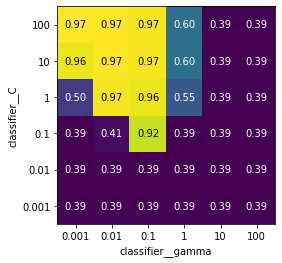

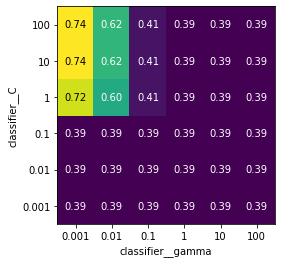

SVM rbf
R^2: 0.9830508474576272
recall_score: 0.9830508474576272
f1_score: 0.9830508474576272
accuracy_score: 0.9830508474576272


,method,precision,recall,f1,accuracy
0,SVM rbf,0.983051,0.983051,0.983051,0.983051


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# SVC RBF KERNEL

# GRID

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
print(grid_1.best_params_)

# HEATMAP

results = pd.DataFrame(grid_1.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,0]
# plot the mean cross-validation scores WITH SCALER
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,1]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

# PRINT SCORES

models.append(('SVM rbf', grid_1.best_estimator_))
scores_1 = get_scores(*models[-1])
print_scores(scores_1)

# INSERT SCORES

summary = pd.DataFrame(data=scores_1, index=[0])
summary

{'classifier__C': 1, 'classifier__degree': 1, 'preprocessing': StandardScaler()}


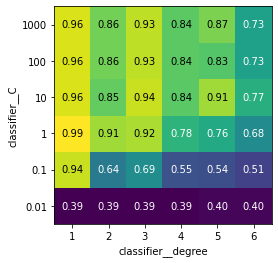

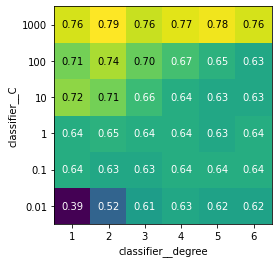

SVM poly
R^2: 0.9830508474576272
recall_score: 0.9830508474576272
f1_score: 0.9830508474576272
accuracy_score: 0.9830508474576272


,method,precision,recall,f1,accuracy
0,SVM rbf,0.983051,0.983051,0.983051,0.983051
1,SVM poly,0.983051,0.983051,0.983051,0.983051


In [16]:
# SVC POLY KERNEL

# GRID
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='poly'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__degree': [i+1 for i in range(6)],
            'classifier__C': [0.01, 0.1, 1, 10, 100, 1000]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, n_jobs=4)

grid_2.fit(X_train, y_train)
print(grid_2.best_params_)

# HEATMAP

results = pd.DataFrame(grid_2.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,0]
# plot the mean cross-validation scores WITH SCALER
heatmap(scores, xlabel='classifier__degree', xticklabels=param_grid['classifier__degree'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,1]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__degree', xticklabels=param_grid['classifier__degree'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

# PRINT SCORES

models.append(('SVM poly', grid_2.best_estimator_))
scores_2 = get_scores(*models[-1])
print_scores(scores_2)

# INSERT SCORES

summary.loc[1] = scores_2
summary

{'classifier__C': 0.1, 'classifier__tol': 0.0001, 'preprocessing': StandardScaler()}


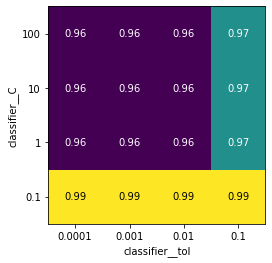

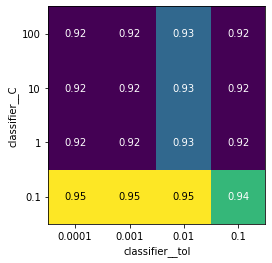

SVM linear
R^2: 0.9830508474576272
recall_score: 0.9830508474576272
f1_score: 0.9830508474576272
accuracy_score: 0.9830508474576272


,method,precision,recall,f1,accuracy
0,SVM rbf,0.983051,0.983051,0.983051,0.983051
1,SVM poly,0.983051,0.983051,0.983051,0.983051
2,SVM linear,0.983051,0.983051,0.983051,0.983051


In [17]:
# SVC LINEAR KERNEL

# GRID
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='linear'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__tol': [1e-4, 1e-3, 1e-2, 1e-1]
}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, n_jobs=4)

grid_3.fit(X_train, y_train)
print(grid_3.best_params_)

# HEATMAP

results = pd.DataFrame(grid_3.cv_results_)
scores = np.array(results.mean_test_score).reshape(4, 4, 2)
scores = scores[:,:,0]
# plot the mean cross-validation scores WITH SCALER
heatmap(scores, xlabel='classifier__tol', xticklabels=param_grid['classifier__tol'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results.mean_test_score).reshape(4, 4, 2)
scores = scores[:,:,1]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__tol', xticklabels=param_grid['classifier__tol'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

# PRINT SCORES

models.append(('SVM linear', grid_3.best_estimator_))
scores_3 = get_scores(*models[-1])
print_scores(scores_3)

# INSERT SCORES

summary.loc[2] = scores_3
summary

{'classifier__C': 10, 'classifier__solver': 'newton-cg', 'preprocessing': StandardScaler()}


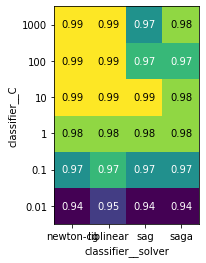

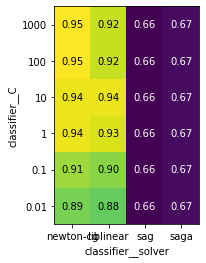

Linear Regression
R^2: 0.9830508474576272
recall_score: 0.9830508474576272
f1_score: 0.9830508474576272
accuracy_score: 0.9830508474576272


,method,precision,recall,f1,accuracy
0,SVM rbf,0.983051,0.983051,0.983051,0.983051
1,SVM poly,0.983051,0.983051,0.983051,0.983051
2,SVM linear,0.983051,0.983051,0.983051,0.983051
3,Linear Regression,0.983051,0.983051,0.983051,0.983051


In [18]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

# GRID
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__solver': ['newton-cg', 'liblinear', 'sag', 'saga'],
            'classifier__C': [0.01, 0.1, 1, 10, 100, 1000]
}

grid_4 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, n_jobs=4)

grid_4.fit(X_train, y_train)
print(grid_4.best_params_)

# HEATMAP

results = pd.DataFrame(grid_4.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 4, 2)
scores = scores[:,:,0]
# plot the mean cross-validation scores WITH SCALER
heatmap(scores, xlabel='classifier__solver', xticklabels=param_grid['classifier__solver'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results.mean_test_score).reshape(6, 4, 2)
scores = scores[:,:,1]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__solver', xticklabels=param_grid['classifier__solver'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

# PRINT SCORES

models.append(('Linear Regression', grid_4.best_estimator_))
scores_4 = get_scores(*models[-1])
print_scores(scores_4)

# INSERT SCORES

summary.loc[3] = scores_4
summary